# EDA

In [1]:
import pandas as pd
# file path to data file
file_path = "../src/taxipred/data/taxi_trip_pricing.csv"
# read in the data in a DataFrame
try:
    df = pd.read_csv(file_path)
    print("File read with no problems")
except FileNotFoundError:
    print(f"Could not fins the file in serach path: {file_path}")
    print("Double check that the file path is correct.")



File read with no problems


In [2]:
# print the first 5 rows
print(df.head())

   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3                 11

In [3]:
# technical overview of columns, data types and nulls
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
None


In [4]:
# overview of how many values that is missing per column.
print(df.isnull().sum())

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


In [5]:
# statistic information about the numerical columns
print(df.describe())

       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        950.000000       950.000000  950.000000   950.000000   
mean          27.070547         2.476842    3.502989     1.233316   
std           19.905300         1.102249    0.870162     0.429816   
min            1.230000         1.000000    2.010000     0.500000   
25%           12.632500         1.250000    2.730000     0.860000   
50%           25.830000         2.000000    3.520000     1.220000   
75%           38.405000         3.000000    4.260000     1.610000   
max          146.067047         4.000000    5.000000     2.000000   

       Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
count       950.000000             950.000000  951.000000  
mean          0.292916              62.118116   56.874773  
std           0.115592              32.154406   40.469791  
min           0.100000               5.010000    6.126900  
25%           0.190000              35.882500   33.742650  
50%           0.29

#### Save columns were Trip_Price is not defined to a new csv file

In [6]:
df_for_prediction = df[df["Trip_Price"].isnull()].copy()
df_for_prediction.to_csv("../src/taxipred/data/taxi_trips_for_prediction.csv", index = False)
print(f"Saved {len(df_for_prediction)} rows without price to a new file for future use.")

Saved 49 rows without price to a new file for future use.


# Data cleaning

In [7]:
df_cleaned = df.copy()
# clean the data from the columns we just moved to a new file so we dont leak the data.
df_cleaned.dropna(subset = ["Trip_Price"], inplace = True)

df_cleaned.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


In [8]:
# add a mean value for all the other numerical columns that contains null values.
for col in ["Trip_Distance_km", "Passenger_Count", "Base_Fare", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes"]:
    if df_cleaned[col].isnull().any():
        median_value = df_cleaned[col].median() # we use median instead of mean to better handle outliers.
        df_cleaned[col].fillna(median_value, inplace = True)
        print(f"Filled the missing values in {col} with the mean value {median_value:.2f}")

Filled the missing values in Trip_Distance_km with the mean value 25.87
Filled the missing values in Passenger_Count with the mean value 2.00
Filled the missing values in Base_Fare with the mean value 3.51
Filled the missing values in Per_Km_Rate with the mean value 1.22
Filled the missing values in Per_Minute_Rate with the mean value 0.29
Filled the missing values in Trip_Duration_Minutes with the mean value 61.57


C:\Users\edwin\AppData\Local\Temp\ipykernel_10204\351062758.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_value, inplace = True)
C:\Users\edwin\AppData\Local\Temp\ipykernel_10204\351062758.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [9]:
# add data to categorical columns that had null values
categorical_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]
for col in categorical_cols:
    if df_cleaned[col].isnull().any():
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)
        print(f"Filled in missing values in '{col}' with the common value '{mode_value}'")

Filled in missing values in 'Time_of_Day' with the common value 'Afternoon'
Filled in missing values in 'Day_of_Week' with the common value 'Weekday'
Filled in missing values in 'Traffic_Conditions' with the common value 'Low'
Filled in missing values in 'Weather' with the common value 'Clear'


C:\Users\edwin\AppData\Local\Temp\ipykernel_10204\3629767928.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_value, inplace=True)


In [10]:
print("Result after cleaning:")
print(df_cleaned.isnull().sum())

Result after cleaning:
Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


#### Indentify outliers with scatterplot

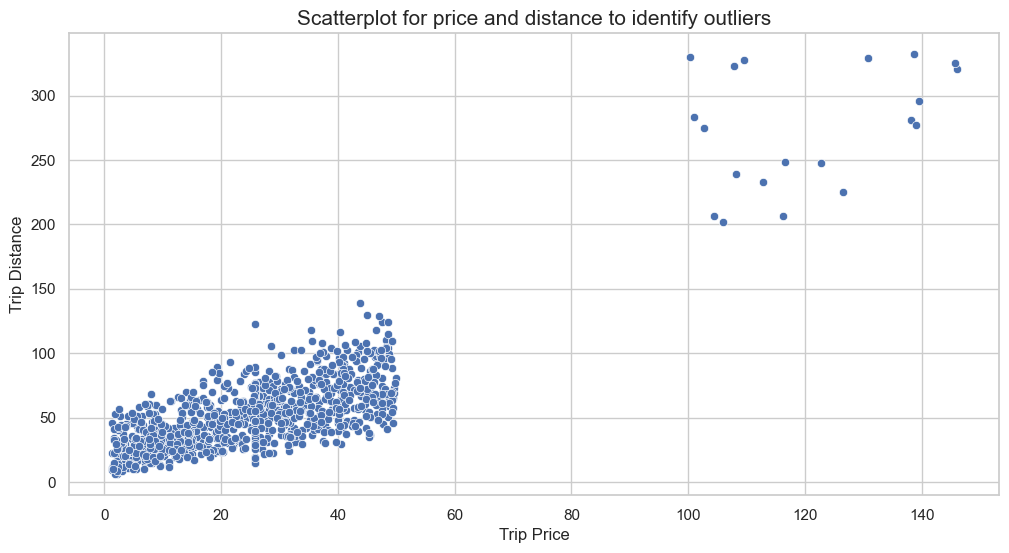

In [ ]:
# import visualization libraries seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# set a theme for all graphs
sns.set_theme(style = "whitegrid")

# Scatterplot for Trip_Price and Trip_Distance_Km
plt.figure(figsize = (12, 6))
sns.scatterplot(x = df_cleaned["Trip_Distance_km"], y = df_cleaned["Trip_Price"])
plt.title("Scatterplot for price and distance to identify outliers", fontsize = 15)
plt.ylabel("Trip Distance", fontsize = 12)
plt.xlabel("Trip Price", fontsize = 12)
plt.show()

#### Separate outliers from data

In [13]:
rows_before = len(df_cleaned)
print(f"Number of rows before removing outliers: {rows_before}")

Number of rows before removing outliers: 951


In [17]:
df_no_outliers = df_cleaned[df_cleaned["Trip_Price"] < 100].copy()
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       892 non-null    float64
 1   Time_of_Day            892 non-null    object 
 2   Day_of_Week            892 non-null    object 
 3   Passenger_Count        892 non-null    float64
 4   Traffic_Conditions     892 non-null    object 
 5   Weather                892 non-null    object 
 6   Base_Fare              892 non-null    float64
 7   Per_Km_Rate            892 non-null    float64
 8   Per_Minute_Rate        892 non-null    float64
 9   Trip_Duration_Minutes  892 non-null    float64
 10  Trip_Price             892 non-null    float64
dtypes: float64(7), object(4)
memory usage: 83.6+ KB


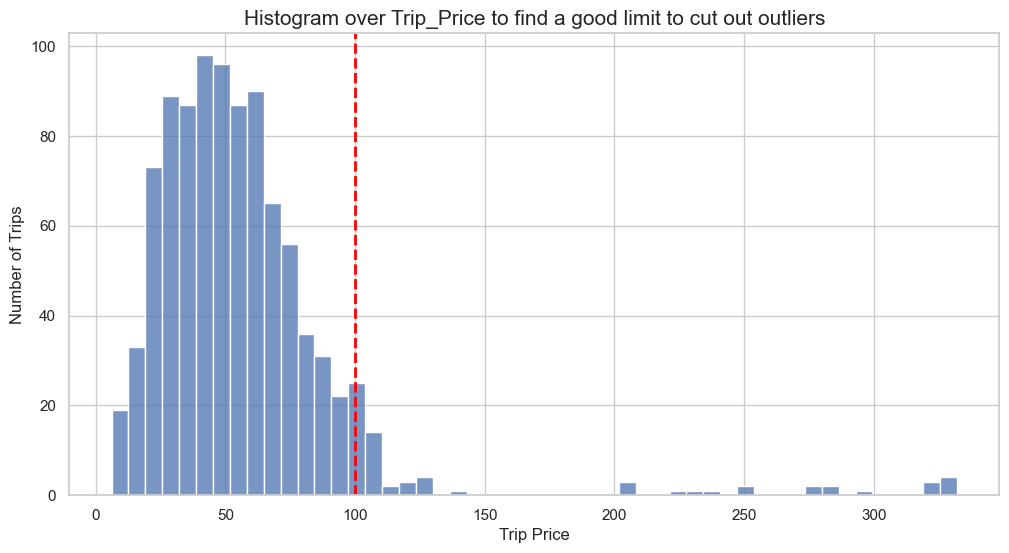

In [18]:
plt.figure(figsize = (12,6))
sns.histplot(df_cleaned["Trip_Price"], bins = 50)
plt.title("Histogram over Trip_Price to find a good limit to cut out outliers", fontsize=15)
plt.xlabel("Trip Price", fontsize = 12)
plt.ylabel("Number of Trips", fontsize = 12)

plt.axvline(100, color = "red", linestyle= "--", linewidth=2)
plt.show()

In [19]:
# correct boxplot with the right outliers removed that we learned from the plot above.
df_no_outliers = df_cleaned[df_cleaned["Trip_Price"] < 150].copy()

rows_after = len(df_no_outliers)
print(f"Number of rows after we removed the correct outliers")
print(f"We removed {rows_before - rows_after} outliers.")


Number of rows after we removed the correct outliers
We removed 20 outliers.


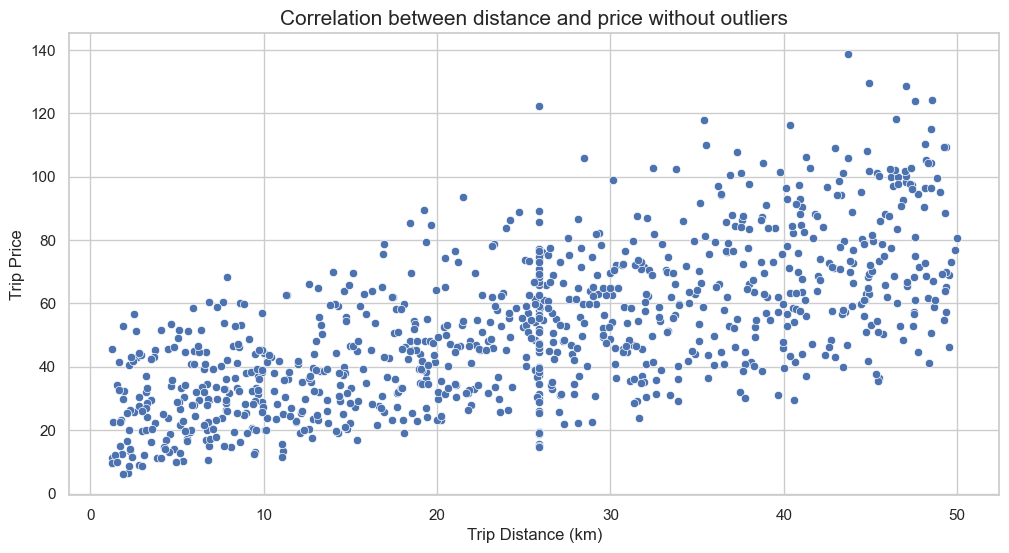

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df_no_outliers["Trip_Distance_km"], y = df_no_outliers["Trip_Price"])
plt.title("Correlation between distance and price without outliers", fontsize = 15)
plt.xlabel("Trip Distance (km)", fontsize = 12)
plt.ylabel("Trip Price", fontsize = 12)
plt.show()